# 1. Proje√ß√£o de mapas

**Fonte:**
este material √© uma tradu√ß√£o e adapta√ß√£o do notebook: <br/> https://github.com/Automating-GIS-processes/site/blob/master/source/notebooks/L2/projections.ipynb

Sistema de refer√™ncia de coordenadas (CRS) s√£o importantes, porque as geometrias utilizadas em GeoDataFrame s√£o simplesmente uma cole√ß√£o de coordenadas em um espa√ßo arbitr√°rio. O CRS diz ao python como essas coordenadas est√£o relacionadas com o espa√ßo no planeta terra. Uma proje√ß√£o de mapa √© uma transforma√ß√£o sistem√°tica de latitudes e longitudes em uma superficie plana, em que as unidades s√£o comumente representadas em metros (em vez de graus). Esta transforma√ß√£o s√£o usadas para representar a terra tridimensional em um mapa plano e bidimensional.

Como o CRS em diferentes conjuntos de dados espaciais diferem com frequ√™ncia (isto √©, pode-se ter coordenadas definidas em graus decimais enquanto em outro conjunto de dados est√° em metros), √© um procedimento comum redefinir (ou reprojetar) o CRS para ser id√™ntico em ambos os datasets. √â importante que as camadas possuam o mesmo sistema de refer√™ncia de coordenadas, pois permite analisar as rela√ß√µes espaciais entre elas, como conduzir uma consulta de um Point em um Polygon.

Escolher uma proje√ß√£o apropriada para o seu mapa nem sempre √©  uma tarefa simples, porque depende do que voc√™ realmente quer representar com seu mapa e de qual √© a escala espacial dos seus dados. De fato, n√£o existe uma "proje√ß√£o perfeita", j√° que cada uma tem alguns pontos fortes e fracos, e voc√™ deve escolher uma proje√ß√£o que se ajuste melhor √†s suas necessidades. Na verdade, a proje√ß√£o que voc√™ escolher pode at√© dizer algo sobre voc√™:
    
![](images/Map-projections.png)
*Fonte: XKCD, See a full comic about ["What your favorite map projection tells about you"](https://xkcd.com/977/)*.

Para aqueles que querem um pouco mais de abordagem anal√≠tica para escolher a proje√ß√£o, voc√™ pode obter uma boa vis√£o geral em [georeference.org](http://www.georeference.org/doc/guide_to_selecting_map_projections.htm), ou neste post introduzindo [os pontos fortes e fracos de algumas proje√ß√µes comumente usadas](http://usersguidetotheuniverse.com/index.php/2011/03/03/whats-the-best-map-projection/).

## 1.1 Sistema de Refer√™ncia de Coordenadas (SRC) no Geopandas

Para este tutorial, usaremos o Shapefile chamado `limitebairro.shp` que possui as fronteiras de cada bairros na cidade de Fortaleza/CE.

O Shapefile deve sempre conter informa√ß√µes sobre o sistema de refer√™ncia de coordenadas que √© armazenado no arquivo `.prj` (se os dados tiverem sido produzidos corretamente). Ao ler os dados em `GeoDataFrame` com Geopandas esta informa√ß√£o √© automaticamente armazenada no atributo `.crs` do GeoDataFrame.

- Vamos come√ßar lendo os dados do arquivo `limitebairro.shp` e verificando o` crs`:

In [53]:
# Import necessary packages
import geopandas as gpd

# Read the file
fp = "data/limitebairro.shp"
data = gpd.read_file(fp)

# Check the coordinate reference system
data.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Como podemos ver, o `crs` √© um conjunto de informa√ß√µes que identificam a proje√ß√£o utilizada, neste caso podemos identificaro o c√≥digo `EPSG:4326`. Essa √© uma maneira muito t√≠pica de como o CRS √© armazenado em GeoDataFrames. H√° tamb√©m outra maneira t√≠pica de representar o sistema de refer√™ncia de coordenadas, ou seja, armazenar essa informa√ß√£o no formato [Proj4-string](https://proj4.org/usage/quickstart.html).

O n√∫mero da sigla __EPSG__ ("European Petroleum Survey Group") √© um c√≥digo que informa sobre o sistema de coordenadas do conjunto de dados. [Conjunto de dados de par√¢metros geod√©sicos EPSG](http://www.epsg.org/) √© uma cole√ß√£o de defini√ß√µes de sistemas de refer√™ncia de coordenadas e coordena transforma√ß√µes que podem ser globais, regionais, nacionais ou locais". O c√≥digo EPSG `4326` que temos aqui, pertence ao sistema de coordenadas WGS84 (isto √©, as coordenadas est√£o em graus decimais: latitudes e longitudes).

Voc√™ pode encontrar mais informa√ß√µes e listas de sistemas de refer√™ncia de coordenadas em:

  - [www.spatialreference.org](http://spatialreference.org/)
  - [www.proj4.org](https://proj4.org/operations/projections/)
  - [www.mapref.org](http://mapref.org/CollectionofCRSinEurope.html)

- Vamos continuar verificando os valores na coluna `geometry` para verificar se o CRS de nosso GeoDataFrame parece correto:

In [5]:
data['geometry'].head()

0    POLYGON ((-38.53982 -3.79554, -38.53974 -3.795...
1    POLYGON ((-38.47933 -3.72091, -38.47930 -3.720...
2    POLYGON ((-38.46765 -3.74968, -38.46751 -3.749...
3    POLYGON ((-38.51716 -3.76998, -38.51726 -3.769...
4    POLYGON ((-38.56888 -3.70169, -38.56893 -3.701...
Name: geometry, dtype: geometry

Como podemos observar, os valores de coordenadas dos pol√≠gonos realmente se parecem com valores de latitude e longitude, ent√£o tudo parece estar em ordem.

## 1.2 Calculando a √°rea em metros

Vamos chamar a fun√ß√£o `area` para o nosso `GeoDataFrame` e analisar o resultado.

In [26]:
selection

id  GID             NOME  \
0  Limite Bairro.fid-2be50750_153af4824fe_2d2e    6          PASSARE   
1  Limite Bairro.fid-2be50750_153af4824fe_2d2f   21    CAIS DO PORTO   
2  Limite Bairro.fid-2be50750_153af4824fe_2d30   22      CIDADE 2000   
3  Limite Bairro.fid-2be50750_153af4824fe_2d31   23  ALTO DA BALANCA   
4  Limite Bairro.fid-2be50750_153af4824fe_2d32   17   BARRA DO CEARA   

                                            geometry  
0  POLYGON ((-38.53982 -3.79554, -38.53974 -3.795...  
1  POLYGON ((-38.47933 -3.72091, -38.47930 -3.720...  
2  POLYGON ((-38.46765 -3.74968, -38.46751 -3.749...  
3  POLYGON ((-38.51716 -3.76998, -38.51726 -3.769...  
4  POLYGON ((-38.56888 -3.70169, -38.56893 -3.701...

In [27]:
# Make a selection that contains only the first five rows
selection = data[0:5]

# Iterate over rows and print the area of a Polygon
for index, row in selection.iterrows():
    # Get the area of the polygon
    poly_area = row['geometry'].area
    # Get the name att of the polygon
    poly_name = row['NOME']
    # Print information for the user
    print("Bairro {name} possui uma √°rea de {area:.5f} graus quadrados".format(name=poly_name, 
                                                                                area=poly_area))

Bairro PASSARE possui uma √°rea de 0.00058 graus quadrados
Bairro CAIS DO PORTO possui uma √°rea de 0.00021 graus quadrados
Bairro CIDADE 2000 possui uma √°rea de 0.00004 graus quadrados
Bairro ALTO DA BALANCA possui uma √°rea de 0.00007 graus quadrados
Bairro BARRA DO CEARA possui uma √°rea de 0.00033 graus quadrados


Como podemos observar, obtemos valores baixos, considerando que estamos calculando a √°rea de grandes aglomerados urbanos. Isso acontece, porque os nosso dados est√£o em um sistema de coordenadas geogr√°fica, desta forma, os nosso valores est√£o representados em graus. A fun√ß√£o de c√°lculo da √°rea n√£o se importa em qual proje√ß√£o os dados est√£o, ela apenas c√°lcula a √°rea de cada geometria do nosso `GeoDataFrame`.

Felizmente, para definir e alterar proje√ß√µes no Geopandas √© f√°cil. Agora vamos reprojetar os dados de
WGS84 (coordenadas de latitude longitude) em uma proje√ß√£o planar, facilitando o c√°lculo das m√©tricas em metros. No nosso exemplo, iremos utilizar a proje√ß√£o padr√£o para am√©rica do sul [SIRGAS 2000](http://www.sirgas.org/pt/sirgas-realizations/sirgas2000/).

De acordo com os dados de datum (SIRGAS 2000), proje√ß√£o (UTM), fuso hor√°rio (24) e o hemisf√©rio (Sul), o c√≥digo para a cidade de Fortaleza √© o EPSG:31984 

In [9]:
epsg_proj = "EPSG:31984"

In [108]:
# Reproject the data
data_proj = data.to_crs(epsg_proj)

# Check the new geometry values
print(data_proj['geometry'].head())

0    POLYGON ((551095.599 9580459.369, 551104.542 9...
1    POLYGON ((557816.513 9588704.498, 557820.203 9...
2    POLYGON ((559112.388 9585523.444, 559127.299 9...
3    POLYGON ((553612.653 9583283.104, 553602.293 9...
4    POLYGON ((547874.164 9590834.764, 547867.807 9...
Name: geometry, dtype: geometry


Podemos ver que os valores de coordenadas nas geometrias foram alterados! Agora, mudamos com sucesso a proje√ß√£o de nossa camada para uma nova.

Vamos novamente chamar a fun√ß√£o area para o nosso GeoDataFrame e analisar o resultado.

In [109]:
# Reproject the data
data_proj = data.to_crs(epsg_proj)

# Make a selection that contains only the first five rows
selection = data_proj[0:5]

# Iterate over rows and print the area of a Polygon
for index, row in selection.iterrows():
    # Get the area of the polygon
    poly_area = row['geometry'].area
    # Get the name att of the polygon
    poly_name = row['NOME']
    # Print information for the user
    print("Bairro {name} possui uma √°rea de {area:.5f} metros quadrados".format(name=poly_name, 
                                                                                area=poly_area))

Bairro PASSARE possui uma √°rea de 7167306.64176 metros quadrados
Bairro CAIS DO PORTO possui uma √°rea de 2562799.52426 metros quadrados
Bairro CIDADE 2000 possui uma √°rea de 497197.33551 metros quadrados
Bairro ALTO DA BALANCA possui uma √°rea de 916449.73840 metros quadrados
Bairro BARRA DO CEARA possui uma √°rea de 4102986.76628 metros quadrados


Agora temos os valores de √°rea em m¬≤. Podemos transformar de m¬≤ para km¬≤ dividindo por 1000000.

In [110]:
# Reproject the data
data_proj = data.to_crs(epsg_proj)

# Make a selection that contains only the first five rows
selection = data_proj[0:5]

# Iterate over rows and print the area of a Polygon
for index, row in selection.iterrows():
    # Get the area of the polygon
    poly_area = row['geometry'].area / 1000000
    # Get the name att of the polygon
    poly_name = row['NOME']
    # Print information for the user
    print("Bairro {name} possui uma √°rea de {area:.5f} quil√¥metros quadrados".format(name=poly_name, 
                                                                                area=poly_area))

Bairro PASSARE possui uma √°rea de 7.16731 quilometros quadrados
Bairro CAIS DO PORTO possui uma √°rea de 2.56280 quilometros quadrados
Bairro CIDADE 2000 possui uma √°rea de 0.49720 quilometros quadrados
Bairro ALTO DA BALANCA possui uma √°rea de 0.91645 quilometros quadrados
Bairro BARRA DO CEARA possui uma √°rea de 4.10299 quilometros quadrados


Vamos salvar nossos dados projetados em um Shapefile para podermos usar mais tarde.

In [111]:
# Ouput filepath
outfp = "data/limitebairro_proj.shp"
    
# Save to disk
data_proj.to_file(outfp)

## 1.3 Calculando a dist√¢ncia em metros

Em seguida, conduziremos um exemplo pr√°tico com o arquivo `limitebairro_proj.shp`. Nosso objetivo √© encontrar as dist√¢ncias euclidianas dos centr√≥ides (pontos m√©dios) de todos os bairros de Fortaleza para a nossa geometria do Campus do Pici.

Vamos primeiro criar um GeoDataFrame que contenha um pol√≠gono representando a localiza√ß√£o do Campus do Pici.

In [112]:
from shapely.geometry import Polygon

# Approximate coordinates of Campus do Pici, UFC (Fortaleza/CE)
coordinates = [(-38.57351, -3.73745), (-38.58482, -3.74404), (-38.58471, -3.74632), (-38.58146, -3.74620),
               (-38.58200, -3.74711), (-38.57242, -3.75738), (-38.57186, -3.75680), (-38.57256, -3.75608),
               (-38.57090, -3.75490), (-38.57079, -3.75400), (-38.57464, -3.74978), (-38.57122, -3.74648),
               (-38.56920, -3.74857), (-38.56670, -3.74600), (-38.56938, -3.74132), (-38.56933, -3.73688)]

# Create a Shapely polygon from the coordinate-tuple list
poly = Polygon(coordinates)

# Create an empty geopandas GeoDataFrame
gdf_pici = gpd.GeoDataFrame([poly], geometry='geometry', 
                            crs='EPSG:4326', 
                            columns=['geometry'])

gdf_pici.loc[0, 'location'] = 'Campus do Pici'

# # Let's see what we have
print(gdf_pici)

                                            geometry        location
0  POLYGON ((-38.57351 -3.73745, -38.58482 -3.744...  Campus do Pici


Para instalar o m√≥dulo pycrs, voc√™ pode utilizar o seguinte comando: conda install -c conda-forge pycrs 

Como podemos ver, √© poss√≠vel criar um GeoDataFrame diretamente utilizando penas uma linha de c√≥digo. Observe que, aqui, especificamos o CRS diretamente passando o crs como a string "EPSG:4326". N√≥s tamb√©m dissemos que a informa√ß√£o `geometry` √© armazenada na coluna `geometry` que n√≥s definimos com o par√¢metro `columns = ['geometry'] `.

Em seguida, precisamos converter essa proje√ß√£o do `GeoDataFrame` para a proje√ß√£o do SIRGAS 2000.

In [113]:
epsg_proj = "EPSG:31984"

gdf_pici_proj = gdf_pici.to_crs(epsg_proj)

# Print the data
print(gdf_pici_proj)

# Print the crs
print('\nCRS:\n', gdf_pici_proj.crs)

                                            geometry        location
0  POLYGON ((547357.837 9586882.111, 546101.598 9...  Campus do Pici

CRS:
 EPSG:31984


Vamos ler novamente todos os bairros e mudar para a proje√ß√£o SIRGAS 2000.

In [114]:
# Set filepath 
fp = "data/limitebairro.json"
epsg_proj = "EPSG:31984"

# Read file using gpd.read_file()
gdf_bairros = gpd.read_file(fp, driver='GeoJSON')
gdf_bairros_proj = gdf_bairros.to_crs(epsg_proj)

# Print the data
print(gdf_bairros_proj.head())

# Print the crs
print('\nCRS:\n', gdf_bairros_proj.crs)

                                            id  GID             NOME  \
0  Limite Bairro.fid-2be50750_153af4824fe_2d2e    6          PASSARE   
1  Limite Bairro.fid-2be50750_153af4824fe_2d2f   21    CAIS DO PORTO   
2  Limite Bairro.fid-2be50750_153af4824fe_2d30   22      CIDADE 2000   
3  Limite Bairro.fid-2be50750_153af4824fe_2d31   23  ALTO DA BALANCA   
4  Limite Bairro.fid-2be50750_153af4824fe_2d32   17   BARRA DO CEARA   

                                            geometry  
0  POLYGON ((551095.599 9580459.369, 551104.542 9...  
1  POLYGON ((557816.513 9588704.498, 557820.203 9...  
2  POLYGON ((559112.388 9585523.444, 559127.299 9...  
3  POLYGON ((553612.653 9583283.104, 553602.293 9...  
4  POLYGON ((547874.164 9590834.764, 547867.807 9...  

CRS:
 EPSG:31984


Agora podemos ver que as coordenadas na coluna `geometry` s√£o n√∫meros bastante grandes, pois representam a dist√¢ncia em metros de acordo com um ponto de refer√™ncia, diferente ds medidas de graus utilizadas anteriormente.

- Vamos tra√ßar as fronteiras dos bairros de Fortaleza e a localiza√ß√£o do Campus do Pici para observar se as mudan√ßas de proje√ß√£o est√£o conforme o esperado.

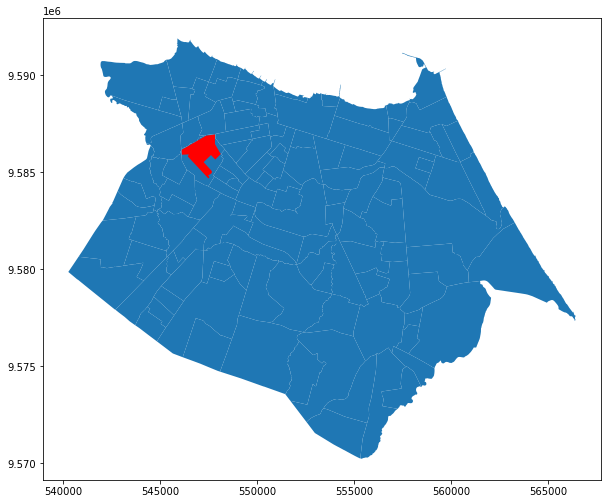

In [115]:
import matplotlib.pyplot as plt

%matplotlib inline
fig, ax = plt.subplots(figsize=(10,10))

# Plot the country borders
gdf_bairros_proj.plot(ax=ax)

# Plot the Helsinki point on top of the borders using the same axis
gdf_pici_proj.plot(ax=ax, color='red', markersize=30)

Como podemos ver no mapa, os dois dados aparentam estar na mesma proje√ß√£o.

Em seguida, nosso objetivo √© calcular a dist√¢ncia de todos os bairros at√© o Campus do Pici. Para podermos fazer isso, precisamos calcular os centr√≥ides de todos os pol√≠gonos que representam os limites dos bairros fortalezenses.

- Isso pode ser feito facilmente em Geopandas usando o atributo `centroid`:

In [118]:
gdf_bairros_proj['centroid'] = gdf_bairros_proj.centroid
gdf_bairros_proj.head(3)

id  GID           NOME  \
0  Limite Bairro.fid-2be50750_153af4824fe_2d2e    6        PASSARE   
1  Limite Bairro.fid-2be50750_153af4824fe_2d2f   21  CAIS DO PORTO   
2  Limite Bairro.fid-2be50750_153af4824fe_2d30   22    CIDADE 2000   

                                            geometry  \
0  POLYGON ((551095.599 9580459.369, 551104.542 9...   
1  POLYGON ((557816.513 9588704.498, 557820.203 9...   
2  POLYGON ((559112.388 9585523.444, 559127.299 9...   

                         centroid  
0  POINT (551957.460 9578515.003)  
1  POINT (558784.923 9589362.498)  
2  POINT (558640.923 9585360.684)

Agora n√≥s criamos uma nova coluna chamada `centroid` que possui as geometrias de Ponto representando os centr√≥ides de cada pol√≠gono (na proje√ß√£o SIRGAS 2000).

Em seguida, calcularemos as dist√¢ncias entre os bairros at√© o centroid do Campus do Pici. Para fazer isso, poder√≠amos usar a fun√ß√£o `iterrows ()` que usamos anteriormente, mas aqui demonstraremos uma t√©cnica mais eficiente (mais r√°pida) para percorrer todas as linhas no GeoDataFrame usando a fun√ß√£o `apply ()`.

A fun√ß√£o [apply ()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.apply.html) pode dar um grande impulso no desempenho sobre o `iterrows ()` e √© a maneira recomend√°vel de iterar as linhas em GeoDataFrames. Aqui, veremos como us√°-la para calcular a dist√¢ncia entre os centr√≥ides dos bairros at√© o centroid do Campus do Pici.

- Antes de usar nossa fun√ß√£o e calcular as dist√¢ncias entre o Campus do Pici e os centr√≥ides, precisamos obter a geometria do ponto Shapely do ponto central do Campus do Pici reprojetado, para que passamos passar para a nossa fun√ß√£o (no par√¢metro `dest_geom`. Podemos usar a fun√ß√£o `loc` para recuperar o valores especificos de √≠ndice e coluna:

In [126]:
# Retrieve the geometry from Campus do Pici GeoDataFrame
pici_centroid = gdf_pici_proj.loc[0, 'geometry'].centroid
print(pici_centroid)

POINT (547179.711048448 9586001.998799218)


Agora vamos calcular todas as dist√¢ncias com apply.

In [127]:
gdf_bairros_proj['dist_to_pici'] = gdf_bairros_proj.apply(lambda row: row.centroid.distance(pici_centroid), axis=1)

In [131]:
gdf_bairros_proj.head(3)

id  GID           NOME  \
0  Limite Bairro.fid-2be50750_153af4824fe_2d2e    6        PASSARE   
1  Limite Bairro.fid-2be50750_153af4824fe_2d2f   21  CAIS DO PORTO   
2  Limite Bairro.fid-2be50750_153af4824fe_2d30   22    CIDADE 2000   

                                            geometry  \
0  POLYGON ((551095.599 9580459.369, 551104.542 9...   
1  POLYGON ((557816.513 9588704.498, 557820.203 9...   
2  POLYGON ((559112.388 9585523.444, 559127.299 9...   

                         centroid  dist_to_pici  
0  POINT (551957.460 9578515.003)      8.881554  
1  POINT (558784.923 9589362.498)     12.081966  
2  POINT (558640.923 9585360.684)     11.479140

Tamb√©m podemos tranformar as nossas dist√¢ncias de metros para quil√¥metros.

In [130]:
gdf_bairros_proj['dist_to_pici'] = gdf_bairros_proj['dist_to_pici'] / 1000

In [132]:
gdf_bairros_proj.head(3)

id  GID           NOME  \
0  Limite Bairro.fid-2be50750_153af4824fe_2d2e    6        PASSARE   
1  Limite Bairro.fid-2be50750_153af4824fe_2d2f   21  CAIS DO PORTO   
2  Limite Bairro.fid-2be50750_153af4824fe_2d30   22    CIDADE 2000   

                                            geometry  \
0  POLYGON ((551095.599 9580459.369, 551104.542 9...   
1  POLYGON ((557816.513 9588704.498, 557820.203 9...   
2  POLYGON ((559112.388 9585523.444, 559127.299 9...   

                         centroid  dist_to_pici  
0  POINT (551957.460 9578515.003)      8.881554  
1  POINT (558784.923 9589362.498)     12.081966  
2  POINT (558640.923 9585360.684)     11.479140

√ìtimo! Agora calculamos com sucesso as dist√¢ncias entre os centr√≥ides de cada bairro em formato de Polygon para o centroid do Campus do Pici em formato de Point. üòé

- Vamos verificar qual √© a dist√¢ncia mais longa e a dist√¢ncia m√©dia para o Campus do Pici, em rela√ß√£o aos centr√≥ides dos outros bairros de fortaleza:

In [134]:
# Calculat the maximum and average distance
max_dist = gdf_bairros_proj['dist_to_pici'].max()
mean_dist = gdf_bairros_proj['dist_to_pici'].mean()

print("Maximum distance to Campus do Pici is %.0f km, and the mean distance is %.0f km." % (max_dist, mean_dist))

Maximum distance to Campus do Pici is 17 km, and the mean distance is 7 km.


Vamos ver em ordem crescente de dist√¢ncia, quais os bairros mais pr√≥ximos com rela√ß√£o ao centr√≥ide.

In [142]:
gdf_bairros_proj.sort_values('dist_to_pici', ascending=True)

id  GID                NOME  \
105  Limite Bairro.fid-2be50750_153af4824fe_2d97  102                PICI   
99   Limite Bairro.fid-2be50750_153af4824fe_2d91   92       PADRE ANDRADE   
58   Limite Bairro.fid-2be50750_153af4824fe_2d68   49        PANAMERICANO   
115  Limite Bairro.fid-2be50750_153af4824fe_2da1  110         DOM LUSTOSA   
110  Limite Bairro.fid-2be50750_153af4824fe_2d9c  106  PRESIDENTE KENNEDY   
..                                           ...  ...                 ...   
50   Limite Bairro.fid-2be50750_153af4824fe_2d60   40       LAGOA REDONDA   
8    Limite Bairro.fid-2be50750_153af4824fe_2d36   28             PAUPINA   
7    Limite Bairro.fid-2be50750_153af4824fe_2d35   26              PEDRAS   
34   Limite Bairro.fid-2be50750_153af4824fe_2d50   11           SAO BENTO   
9    Limite Bairro.fid-2be50750_153af4824fe_2d37   48          SABIAGUABA   

                                              geometry  \
105  POLYGON ((548056.004 9585341.580, 548049.228 9...   
99   POLYGON ((546128.979 9587527.481, 546150.139 9...   
58   POLYGON ((547790.757 9584777.621, 547726.477 9...   
115  POLYGON ((546349.250 9585139.782, 546352.710 9...   
110  POLYGON ((546947.172 9587888.345, 546952.753 9...   
..                                                 ...   
50   POLYGON ((559116.378 9574901.995, 559037.988 9...   
8    POLYGON ((557111.551 9572820.818, 557238.674 9...   
7    POLYGON ((555310.209 9570240.217, 555309.000 9...   
34   POLYGON ((557238.674 9572798.279, 557111.551 9...   
9    POLYGON ((563276.467 9582398.879, 563278.307 9...   

                           centroid  dist_to_pici  
105  POINT (547217.418 9585706.867)      0.297531  
99   POINT (546572.934 9587052.535)      1.213180  
58   POINT (548277.125 9584854.883)      1.587511  
115  POINT (545758.666 9585135.024)      1.664637  
110  POINT (547724.419 9587647.532)      1.733345  
..                              ...           ...  
50   POINT (560043.184 9577159.094)     15.609801  
8    POINT (556386.334 9573261.990)     15.718452  
7    POINT (554245.568 9571661.421)     15.986823  
34   POINT (557477.064 9573725.019)     16.023723  
9    POINT (563289.484 9580008.313)     17.188631  

[119 rows x 6 columns]

Aviso: se voc√™ quiser calcular dist√¢ncias entre v√°rios locais ao redor do mundo, √© recomend√°vel usar a [f√≥rmula de Haversine](https://en.wikipedia.org/wiki/Haversine_formula) para fazer os c√°lculos. O pacote [Haversine](https://github.com/mapado/haversine) em Python fornece uma fun√ß√£o f√°cil de usar para calcular com base em valores de latitude e longitude.

## Resumo 

Durante este tutorial, vimos como:

**1)** Definir o sistema de refer√™ncia de coordenadas utilizando o c√≥digo EPSG; <br/>
**2)** Reprojetar (transformar) as geometrias de um CRS para outro usando a fun√ß√£o `to_crs ()` no GeoPandas; <br/>
**3)** Calcular as dist√¢ncias entre os locais e usar a fun√ß√£o `apply()` para iterar as linhas de maneira mais eficiente do que usando o `iterrows()`. 